In [1]:
#get the data 
import pandas as pd
import sklearn
import numpy as np
data = pd.read_csv("013 heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#lets get the x and y (features and labels )
X =  data.drop("target",axis=1)
Y  = data["target"]

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)


In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [6]:
clf.score(x_train,y_train)

1.0

In [7]:
clf.score(x_test,y_test)

0.8524590163934426

In [8]:
pred_probs = clf.predict(x_test)
pred_probs

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [10]:
print(classification_report(y_test,pred_probs))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.86      0.89      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [11]:
accuracy_score(y_test,pred_probs)

0.8524590163934426

In [12]:
confusion_matrix(y_test,pred_probs)

array([[21,  5],
       [ 4, 31]], dtype=int64)

In [13]:
for i in range(1,100,10):
    print(f"the parameters value is {i}")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    scores = clf.score(x_test,y_test)
    print(f"the scores of our model is {scores}\n")

the parameters value is 1
the scores of our model is 0.8032786885245902

the parameters value is 11
the scores of our model is 0.819672131147541

the parameters value is 21
the scores of our model is 0.8360655737704918

the parameters value is 31
the scores of our model is 0.8360655737704918

the parameters value is 41
the scores of our model is 0.8688524590163934

the parameters value is 51
the scores of our model is 0.8360655737704918

the parameters value is 61
the scores of our model is 0.819672131147541

the parameters value is 71
the scores of our model is 0.7868852459016393

the parameters value is 81
the scores of our model is 0.8032786885245902

the parameters value is 91
the scores of our model is 0.819672131147541



In [14]:
import pickle 
pickle.dump(clf,open("randomforestmodel","wb"))


In [15]:
loaded_model = pickle.load(open("randomforestmodel","rb"))
loaded_model.score(x_test,y_test)

0.819672131147541

In [16]:
car_sales_e = pd.read_csv("car-sales-extended.csv")
car_sales_e.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [17]:
x = car_sales_e.drop("Price",axis=1)
y = car_sales_e["Price"]

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
o = OneHotEncoder()
s_c = ["Make","Colour","Doors"]
c_t = ColumnTransformer([("one_hot",o,s_c)],remainder="passthrough")
t_x = c_t.fit_transform(x)
t_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [19]:
pd.DataFrame(t_x,)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [20]:
dum = pd.get_dummies(car_sales_e[["Make","Colour","Doors"]])
dum

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [21]:
x_train,x_test,y_train,y_test = train_test_split(t_x,y,test_size=0.2)

In [22]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=91)

In [23]:
clf.score(x_train,y_train)

1.0

In [24]:
clf.score(x_test,y_test)

0.0

In [25]:
car_sales_m = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_m.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [26]:
car_sales_m.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
car_sales_m["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [28]:
car_sales_m["Make"].fillna("Missing",inplace=True)#inplace means original data also change
car_sales_m["Colour"].fillna("Missing",inplace=True)
car_sales_m["Odometer (KM)"].fillna(car_sales_m["Odometer (KM)"].mean(),inplace=True)
car_sales_m["Doors"].fillna(4,inplace=True)
car_sales_m

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [29]:
car_sales_m.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [30]:
car_sales_m.dropna(inplace=True)

In [31]:
car_sales_m.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [32]:
car_sales_m = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_m

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
car_sales_m.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
car_sales_m.dropna(subset="Price",inplace=True)
car_sales_m.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [35]:
x = car_sales_m.drop("Price",axis=1)
y = car_sales_m["Price"]

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

string_impute = SimpleImputer(strategy="constant",fill_value="Missing")
num_impute = SimpleImputer(strategy="constant",fill_value=4)
mean_impute = SimpleImputer(strategy="mean")

string_features = ["Make","Colour"]
num_features = ["Doors"]
mean_features=["Odometer (KM)"]

c_t = ColumnTransformer([("string_imputer",string_impute,string_features),
                        ("num_imputer",num_impute,num_features),
                        ("mean_impute",mean_impute,mean_features)])
t_x = c_t.fit_transform(x)
t_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [37]:
fill_car_sales = pd.DataFrame(t_x,columns=["Make","Colour","Doors","Odometer(KM)"])
fill_car_sales

,Make,Colour,Doors,Odometer(KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,Missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
o_e = OneHotEncoder()
features = ["Make","Colour","Doors"]
c_t = ColumnTransformer([("o_e",o_e,features)],remainder="passthrough")
o_c_s = c_t.fit_transform(fill_car_sales)
o_c_s

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [39]:
x_train,x_test,y_train,y_test = train_test_split(o_c_s,y)


In [40]:
x_train

<712x15 sparse matrix of type '<class 'numpy.float64'>'
	with 2848 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.2292496585061008

In [42]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [43]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [44]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [45]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [46]:
np.random.seed(0)
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [47]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5943075006070295

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7977645205563335

In [49]:
heart_disease = pd.read_csv("013 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [52]:
from sklearn.svm import LinearSVC
model_1 = LinearSVC()
model_1.fit(x_train,y_train)
model_1.score(x_test,y_test)

C:\Users\sriram\Desktop\sample_project\environment\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.819672131147541

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier()
model_2.fit(x_train,y_train)
model_2.score(x_test,y_test)

0.8360655737704918

Unstructed data = (images,text,voice etc...) = neural network,dense layers..

Structured data = (tabular columns) = ensemble models :)

In [54]:
y_pred = model_2.predict(x_test)
np.mean(y_pred==y_test)

0.8360655737704918

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8360655737704918

In [56]:
y_pred_probs = model_2.predict_proba(x_test)
y_pred_probs[:10]

array([[0.16, 0.84],
       [0.95, 0.05],
       [0.3 , 0.7 ],
       [0.57, 0.43],
       [0.21, 0.79],
       [0.51, 0.49],
       [0.82, 0.18],
       [0.02, 0.98],
       [0.07, 0.93],
       [0.65, 0.35]])

In [57]:
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [58]:
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [60]:
model_3 = RandomForestRegressor()
model_3.fit(x_train,y_train)
y_preds=model_3.predict(x_test)

In [61]:
y_preds[:10]

array([1.31924  , 3.5493107, 3.1520405, 2.0346401, 2.6286101, 1.8255   ,
       2.1355301, 1.7453003, 1.90065  , 4.034243 ])

In [62]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

0.3228741488372095

## Evaluating the model with `score` method

In [63]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [64]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model_4 = RandomForestClassifier()
model_4.fit(x_train,y_train)
y_preds=model_4.predict(x_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [66]:
model_4.score(x_test,y_test)

0.8524590163934426

In [67]:
x = housing_df.drop("target",axis=1)
y = housing_df["target"]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model_3 = RandomForestRegressor()
model_3.fit(x_train,y_train)
y_preds=model_3.predict(x_test)
model_3.score(x_test,y_test)

0.812831959930628

In [68]:
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier()
model_2.fit(x_train,y_train)
model_2.score(x_test,y_test)
y_pred = model_2.predict(x_test)

In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_2,x,y)

array([0.83606557, 0.90163934, 0.81967213, 0.81666667, 0.78333333])

Creating batches 5 accross our data and fiting and training our model 

default it uses score method to evaluate our data's

In [70]:
np.mean(cross_val_score(model_2,x,y)),model_2.score(x_test,y_test)

(0.8149726775956283, 0.7704918032786885)

# metrics

#  * Accuracy

In [71]:
c_v_s = np.mean(cross_val_score(model_2,x,y))
print(f"the model cross_val_score is :{c_v_s*100:.2f}%")

the model cross_val_score is :80.84%


 #   *Area Under the Receiver Operating  Characteristic Curve(AUC/ROC)

In [72]:
#roc curve is nothing but comparision of models true positive and false positive rate(tpr vs fpr)
from sklearn.metrics import roc_curve
y_pred_probs = model_2.predict_proba(x_test)
p_y_p_p = y_pred_probs[:,1]
fpr,tpr,thresholds = roc_curve(y_test,p_y_p_p)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03703704, 0.03703704, 0.07407407, 0.07407407, 0.07407407,
       0.11111111, 0.11111111, 0.14814815, 0.14814815, 0.22222222,
       0.22222222, 0.25925926, 0.25925926, 0.2962963 , 0.2962963 ,
       0.33333333, 0.37037037, 0.44444444, 0.48148148, 0.48148148,
       0.48148148, 0.51851852, 0.66666667, 0.66666667, 1.        ])

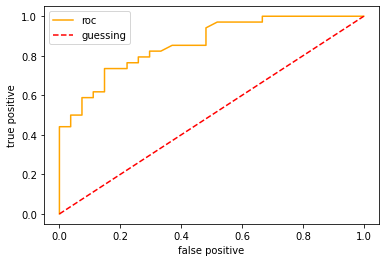

In [73]:
def plot_roc_curve(fpr,tpr):
    import matplotlib.pyplot as plt
    plt.plot(fpr,tpr,color="orange",label="roc")
#     guessing the value positive or not positive
    plt.plot([0,1],[0,1],color="red",linestyle="--",label="guessing")
    plt.xlabel("false positive")
    plt.ylabel("true positive")
    plt.legend()
    
plot_roc_curve(fpr,tpr)

In [74]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,p_y_p_p)

0.8605664488017429

# Confustion matrix

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[19,  8],
       [ 6, 28]], dtype=int64)

In [76]:
pd.crosstab(y_test,y_pred,rownames=["ActualClass"],colnames=["predictedClass"])

predictedClass,0,1
ActualClass,,
0,19,8
1,6,28


In [77]:
# importing new library using just jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



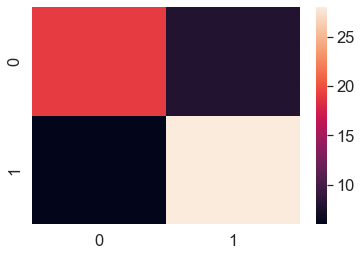

In [78]:
import seaborn as sea 
sea.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test,y_pred)
sea.heatmap(conf_mat);

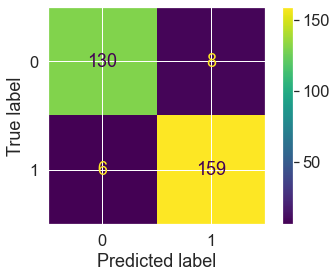

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_2,x,y)

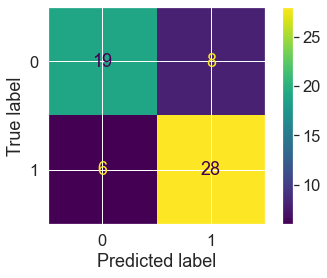

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# Classification report

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.78      0.82      0.80        34

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



In [82]:
test_pos = np.zeros(100)
test_pos[0] = 1
test_pred = np.zeros(100)
pd.DataFrame(classification_report(test_pos,test_pred,output_dict=True))

C:\Users\sriram\Desktop\sample_project\environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriram\Desktop\sample_project\environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriram\Desktop\sample_project\environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.990000,0.0,0.99,0.495000,0.980100
recall,1.000000,0.0,0.99,0.500000,0.990000
f1-score,0.994975,0.0,0.99,0.497487,0.985025
support,99.000000,1.0,0.99,100.000000,100.000000


# Regression evaluations

In [83]:
x = housing_df.drop("target",axis=1)
y = housing_df["target"]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model_3 = RandomForestRegressor()
model_3.fit(x_train,y_train)
y_preds=model_3.predict(x_test)
model_3.score(x_test,y_test)

0.811848132830139

In [84]:
np.mean(y_test)

2.1153852010658905

if our model came close/predicted to the mean value for every value in our data it will get 0.0 (R square) score and if it predicted y_test value as it is then it will get 1.0

 lets see it in action 

In [85]:
from sklearn.metrics import r2_score
y_test_pred = np.full(len(y_test),y_test.mean())
y_test_pred[:10]

array([2.1153852, 2.1153852, 2.1153852, 2.1153852, 2.1153852, 2.1153852,
       2.1153852, 2.1153852, 2.1153852, 2.1153852])

In [86]:
r2_score(y_test,y_test_pred)

1.1102230246251565e-16

In [87]:
y_test_pred = y_test
r2_score(y_test,y_test_pred)

1.0

# mae

In [88]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,model_3.predict(x_test))

0.3295937511870157

In [89]:
y_pred=model_3.predict(x_test)

In [90]:
df = pd.DataFrame({"Actual_Value":y_test,
             "Predicted_Value":y_pred,
             "Distance between them":y_test-y_pred})
df.head()

,Actual_Value,Predicted_Value,Distance between them
14520,1.60300,1.756080,-0.153080
10714,2.31600,2.047410,0.268590
903,2.22700,2.143550,0.083450
10647,5.00001,4.646997,0.353013
3784,3.09400,3.029280,0.064720


In [91]:
# mae formula
np.abs(y_test-y_pred).mean()

0.32959375118701617

In [92]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.25962646378764764

In [93]:
df_large_error = df.copy()
df_large_error

,Actual_Value,Predicted_Value,Distance between them
14520,1.60300,1.756080,-0.153080
10714,2.31600,2.047410,0.268590
903,2.22700,2.143550,0.083450
10647,5.00001,4.646997,0.353013
3784,3.09400,3.029280,0.064720
...,...,...,...
11733,0.97700,1.358820,-0.381820
10577,2.73800,2.042130,0.695870
3770,3.43400,3.280140,0.153860
7595,1.05800,1.361920,-0.303920


In [94]:
df_large_error.iloc[0]["Distance between them"] = 16
df_large_error

,Actual_Value,Predicted_Value,Distance between them
14520,1.60300,1.756080,16.000000
10714,2.31600,2.047410,0.268590
903,2.22700,2.143550,0.083450
10647,5.00001,4.646997,0.353013
3784,3.09400,3.029280,0.064720
...,...,...,...
11733,0.97700,1.358820,-0.381820
10577,2.73800,2.042130,0.695870
3770,3.43400,3.280140,0.153860
7595,1.05800,1.361920,-0.303920


In [95]:
from sklearn.model_selection import cross_val_score
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
c_v_s = cross_val_score(model,x,y,cv=5,scoring="accuracy")#default scoring metrics
print(f"the output is :{c_v_s}%")

the output is :[0.81967213 0.8852459  0.81967213 0.8        0.78333333]%


In [96]:
accuracy_mean = np.mean(c_v_s)
accuracy_mean

0.821584699453552

In [97]:
c_v_s = cross_val_score(model,x,y,scoring="precision")
precision_mean = np.mean(c_v_s)
precision_mean

0.8290595030514385

In [98]:
c_v_s = cross_val_score(model,x,y,scoring="recall")
recall_mean = np.mean(c_v_s)
recall_mean

0.8484848484848484

In [99]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [100]:
x = housing_df.drop("target",axis=1)
y = housing_df["target"]
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
c_v_s = cross_val_score(model,x,y,scoring="r2")#default score metrics
r2_mean = np.mean(c_v_s)
r2_mean

0.6502171793619356

In [101]:
c_v_s = cross_val_score(model,x,y,scoring="neg_mean_absolute_error")
mae_mean = np.mean(c_v_s)
mae_mean

-0.46604112467538766

In [102]:
c_v_s = cross_val_score(model,x,y,scoring="neg_mean_squared_error")
mse_mean = np.mean(c_v_s)
mse_mean

-0.42944808132047496

In [103]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

c_model = RandomForestClassifier()

c_model.fit(x_train,y_train)

y_pred = c_model.predict(x_test)

c_model.score(x_test,y_test)

0.8360655737704918

In [104]:
a_s = accuracy_score(y_test,y_pred)
p_s = precision_score(y_test,y_pred)
f1_s = f1_score(y_test,y_pred)
r_s = recall_score(y_test,y_pred)

In [105]:
a_s,p_s,f1_s,r_s

(0.8360655737704918, 0.8181818181818182, 0.84375, 0.8709677419354839)

In [106]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

r_model = RandomForestRegressor()

r_model.fit(x_train,y_train)

y_pred = r_model.predict(x_test)

r_model.score(x_test,y_test)

0.8154979511316025

In [107]:
r_s = r2_score(y_test,y_pred)
r_s

0.8154979511316025

In [108]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.32134138502906995

In [109]:
mse = mean_squared_error(y_test,y_pred)
mse

0.2373158100063297

# Creating baseline model 

In [110]:
def evaluate_preds(y_true,y_pred):
    a = accuracy_score(y_true,y_pred)
    f_s = f1_score(y_true,y_pred)
    p_s = precision_score(y_true,y_pred)
    r_s = recall_score(y_true,y_pred)
    
    dict = {"Accuracy":round(a,2),
           "f1_score":round(f_s,2),
           "precision_score":round(p_s,2),
           "recall_score":round(r_s,2)}
    
    print(f"accuracy:{a*100:.2f}%")
    print(f"f1_score:{f_s}")
    print(f"percision_score{p_s}")
    print(f"recall_score{r_s}")
    
    return dict

In [114]:
heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7*len(x))
val_split = round(train_split+0.15*len(x))

x_train,y_train = x[:train_split],y[:train_split]
x_val,y_val = x[train_split:val_split],y[train_split:val_split]
x_test,y_test = x[val_split:],y[val_split:]

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train,y_train)

y_pred = model.predict(x_val)

model.score(x_val,y_val)


0.8222222222222222

In [115]:
b_e=evaluate_preds(y_val,y_pred)

accuracy:82.22%
f1_score:0.8518518518518519
percision_score0.8518518518518519
recall_score0.8518518518518519


In [116]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [117]:
np.random.seed(0)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model_1 = RandomForestClassifier(n_jobs=1)

from sklearn.model_selection import RandomizedSearchCV

p_dict = {"n_estimators":[10,100,200,500,1000,1200],
         "max_depth":[None,5,10,20,30],
         "max_features":["auto","sqrt"],
         "min_samples_split":[2,4,6],
         "min_samples_leaf":[1,2,4]}


rsc = RandomizedSearchCV(estimator=model_1,verbose=2,cv=5,n_iter=10,param_distributions=p_dict)

rsc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [118]:
rsc.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [119]:
r_pred = rsc.predict(x_test)
r_e=evaluate_preds(y_test,r_pred)

accuracy:80.33%
f1_score:0.8125
percision_score0.7647058823529411
recall_score0.8666666666666667


In [120]:
np.random.seed(0)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model_1 = RandomForestClassifier(n_jobs=1)

from sklearn.model_selection import GridSearchCV

g_dict = {"n_estimators":[100,200,500],
         "max_depth":[None,10,30],
         "max_features":["auto","sqrt"],
         "min_samples_split":[2],
         "min_samples_leaf":[4]}


gsc = GridSearchCV(estimator=model_1,verbose=2,cv=5,param_grid=g_dict)

gsc.fit(x_train,y_train)

g_pred = gsc.predict(x_test)

g_e=evaluate_preds(y_test,g_pred)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, 

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt

In [121]:
gsc.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

<AxesSubplot:>

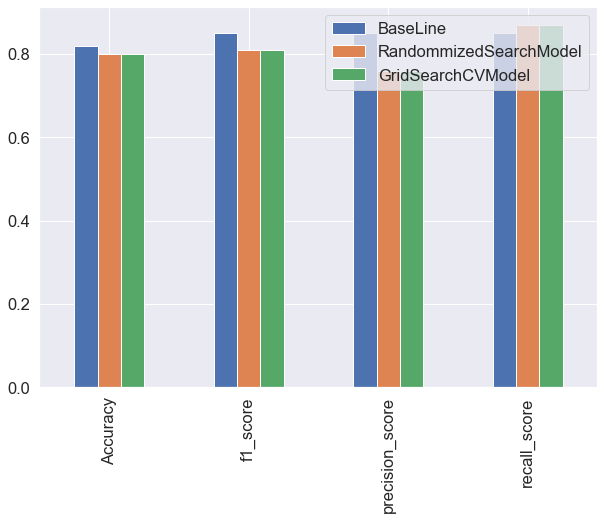

In [122]:
final_results = pd.DataFrame({"BaseLine":b_e,
                             "RandommizedSearchModel":r_e,
                             "GridSearchCVModel":g_e})
final_results.plot.bar(figsize=(10,7))

# Save the model

In [123]:
import pickle
pickle.dump(gsc,open("GridSearchCrossValidation.pkl","wb"))#open is for accessing input and output in python.. wb = write binary

In [124]:
loaded_model = pickle.load(open("GridSearchCrossValidation.pkl","rb"))
l_pred = loaded_model.predict(x_test)
evaluate_preds(y_test,l_pred)

accuracy:80.33%
f1_score:0.8125
percision_score0.7647058823529411
recall_score0.8666666666666667


{'Accuracy': 0.8,
 'f1_score': 0.81,
 'precision_score': 0.76,
 'recall_score': 0.87}

In [125]:
from joblib import dump,load
dump(gsc,filename="gsc.joblib")

['gsc.joblib']

In [126]:
loaded = load(filename="gsc.joblib")

p = loaded.predict(x_test)
evaluate_preds(y_test,p)

accuracy:80.33%
f1_score:0.8125
percision_score0.7647058823529411
recall_score0.8666666666666667


{'Accuracy': 0.8,
 'f1_score': 0.81,
 'precision_score': 0.76,
 'recall_score': 0.87}

# lets put it all together 

In [127]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [128]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [136]:
#Getting For Preprocessings
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Getting for model
from sklearn.ensemble import RandomForestRegressor

#importing the data droping the price nan values
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace = True)
# data.isna().sum()

#Creating pipelines of imputers and onehotencoder for preprocessing
o_h_features = ["Make","Colour"]
o_h_imputer = Pipeline(steps=[("simpleimputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                             ("onehot",OneHotEncoder(handle_unknown="ignore"))])
d_features = ["Doors"]
d_imputer = Pipeline(steps=[("sim",SimpleImputer(strategy="constant",fill_value=4))])

num_features = ["Odometer (KM)"]
num_imputer = Pipeline(steps=[("sim",SimpleImputer(strategy="mean"))])

#creating a preprocessing layer with columntransformer
preprocessing = ColumnTransformer([("oh_imputer",o_h_imputer,o_h_features),
                                  ("d_imputer",d_imputer,d_features),
                                  ("num_imputer",num_imputer,num_features)],remainder="passthrough")

#creating a model with pipeline 
model = Pipeline(steps=[("preprocessing",preprocessing),
                      ("regressor", RandomForestRegressor())])

#creating train and test split
x = data.drop("Price",axis=1)
y = data["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#fitting a model 
model.fit(x_train,y_train)

#evaluating the model 
model.score(x_test,y_test)

0.1414578719966869

In [138]:
model.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('oh_imputer',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='constant')),
                                                    ('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Make', 'Colour']),
                                   ('d_imputer',
                                    Pipeline(steps=[('sim',
                                                     SimpleImputer(fill_value=4,
                                                                   strategy='constant'))]),
                                    ['Doors']),
                                   ('num_imputer',
            

In [139]:
#Let use the girdsearchcv to improve our model hyperparameters(the thing that we can change ... parameter is what  a machine is learning)
gird = {"preprocessing__num_imputer__sim__strategy":["mean","median"],
       "regressor__n_estimators":[100,200,1000],
       "regressor__max_depth":[None,5],
       "regressor__max_features":["auto","sqrt"],
       "regressor__min_samples_split":[6,2],
       "regressor__min_samples_leaf":[4]}

from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(model,gird,cv=5,verbose=2)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=100; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=100; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=100; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=100; total time=   0.1s
[CV] END preprocessing__num_imputer__s

[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=1000; total time=   1.0s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=None, regressor__max_

[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=1000; total time=   1.2s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.0s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.0s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.0s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=auto, 

[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.1s
[CV] END preprocessing__num_imputer__sim__strategy=mean, regressor__max_depth=5, regressor__max_features=sqrt, r

[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=None, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=1000; total time=   1.6s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=None, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=1000; total time=   1.6s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=100; total time=   0.0s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=100; total time=   0.0s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=None, regr

[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   0.2s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   0.2s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   0.2s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=200; total time=   0.2s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_featur

[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=1000; total time=   0.9s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=1000; total time=   0.9s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=6, regressor__n_estimators=1000; total time=   0.9s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.0s
[CV] END preprocessing__num_imputer__sim__strategy=median, regressor__max_depth=5, regressor__max_fea

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('oh_imputer',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colo

In [140]:
gsv.score(x_test,y_test)

0.258476676454502

In [141]:
gsv.best_params_

{'preprocessing__num_imputer__sim__strategy': 'mean',
 'regressor__max_depth': 5,
 'regressor__max_features': 'auto',
 'regressor__min_samples_leaf': 4,
 'regressor__min_samples_split': 6,
 'regressor__n_estimators': 100}